In [1]:
# First imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns


In [2]:
# Making sure whether the session is ran on GPU or CPU 
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("This session will run on CPU.")

GPU support is enabled for this session.


In [3]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Sun Feb 11 22:18:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.09                 Driver Version: 546.09       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   65C    P8              14W /  80W |   1795MiB /  6144MiB |     26%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Now we read the data file 
data = pd.read_csv("C:\\Users\\Intes\\Desktop\\SDA Clarusway\\Notebooks\\In-class notebooks\\DL\\DL-S3 Regression with ANN\kc_house_data.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Here we can see all the columns so we can remove the irrelevant ones
# As an example of the irrelevant columns we can see that the id columns will add no valuable information to the model to capture the relationships between the data points 
data.drop(columns='id', inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [9]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# Checking if there are any missing values 
data.isnull().sum().any()

False

<AxesSubplot:xlabel='price', ylabel='Count'>

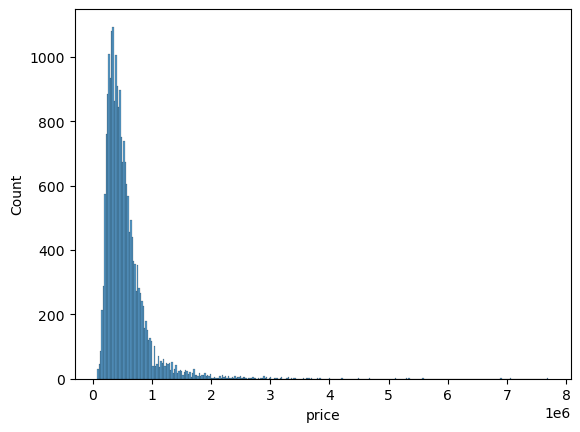

In [11]:
# Now since we are focusing on the prices and it is our target variable, let's observe it more
sns.histplot(x=data['price'])


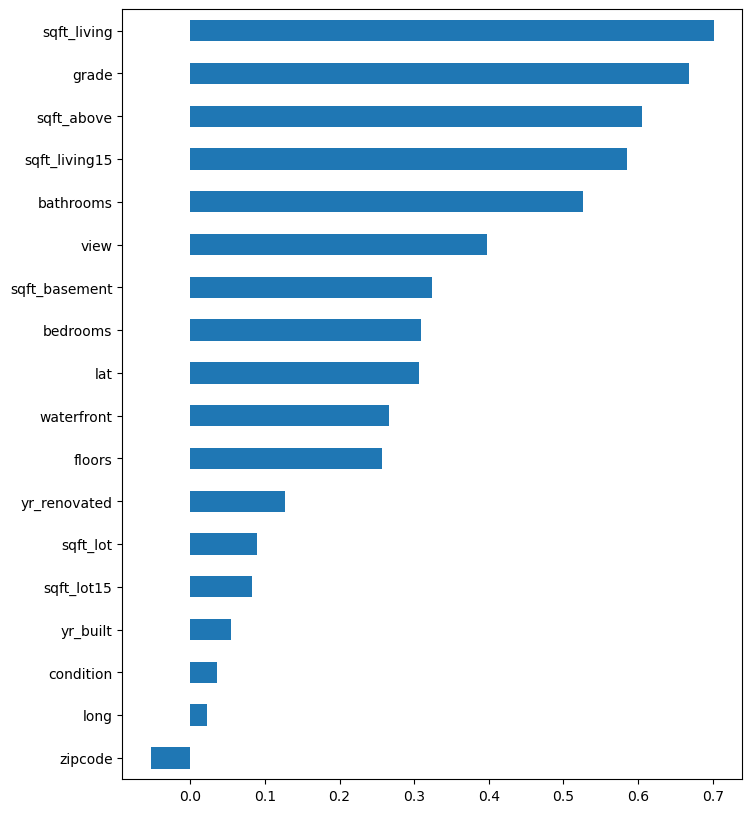

In [12]:
# Since we want to predict prices and it is our target variable, we will now focus on the features 
# Setting the figures sizes
plt.figure(figsize=(8, 10))
(data.corr(numeric_only=True)["price"].sort_values().drop("price").plot(kind="barh"))
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = data.drop(columns=['price','date'])
y = data['price']

In [15]:
seed =101
train_x, test_x,train_y,test_y = train_test_split(x,y,random_state=seed, test_size=0.1)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [20]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim=train_x.shape[1]))
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                456       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x= train_x,y=train_y,validation_split = 0.15, batch_size=128,epochs= 100 )

Epoch 1/100
130/130 [==============================] - 5s 8ms/step - loss: 424215871488.0000 - val_loss: 451033235456.0000
Epoch 2/100
130/130 [==============================] - 1s 5ms/step - loss: 423822196736.0000 - val_loss: 449740832768.0000
Epoch 3/100
130/130 [==============================] - 1s 5ms/step - loss: 419391438848.0000 - val_loss: 439676698624.0000
Epoch 4/100
130/130 [==============================] - 1s 4ms/step - loss: 397981777920.0000 - val_loss: 401526521856.0000
Epoch 5/100
130/130 [==============================] - 1s 5ms/step - loss: 337922588672.0000 - val_loss: 314045956096.0000
Epoch 6/100
130/130 [==============================] - 1s 5ms/step - loss: 232935342080.0000 - val_loss: 196021452800.0000
Epoch 7/100
130/130 [==============================] - 1s 4ms/step - loss: 133853585408.0000 - val_loss: 125149274112.0000
Epoch 8/100
130/130 [==============================] - 1s 5ms/step - loss: 97779998720.0000 - val_loss: 113070153728.0000
Epoch 9/100
130/1

In [27]:
history = pd.DataFrame(model.history.history)

<function matplotlib.pyplot.show(close=None, block=None)>

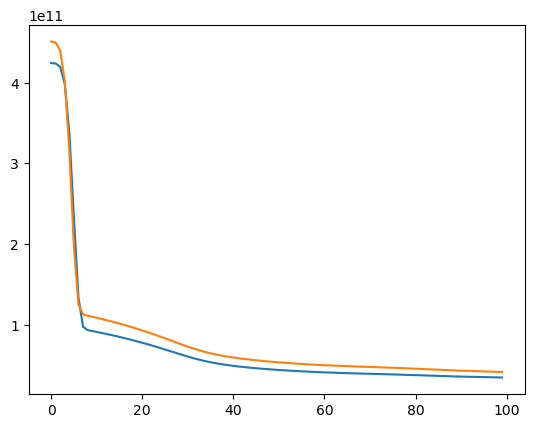

In [28]:
plt.plot(history)
plt.show